In [5]:
%pip install seaborn

# Import necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv(r"irisflower.csv")

data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


# Displaying summary statistics

In [7]:
data.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Display column names and check for missing values

data.columns
data.isna().sum()

# Visualize the data using box plots

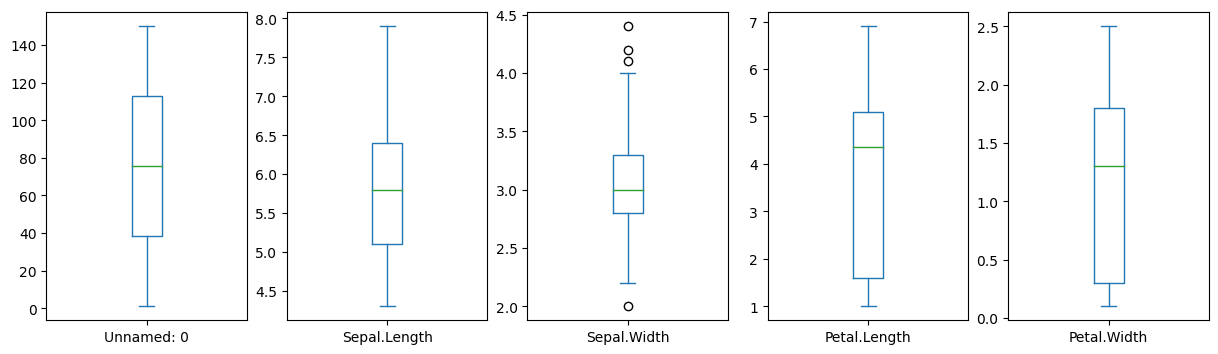

In [9]:
data.plot(kind='box', subplots=True, layout=(1, 5), sharex=False, sharey=False, figsize=(15, 4))
plt.show()

# Visualize the data violin plots

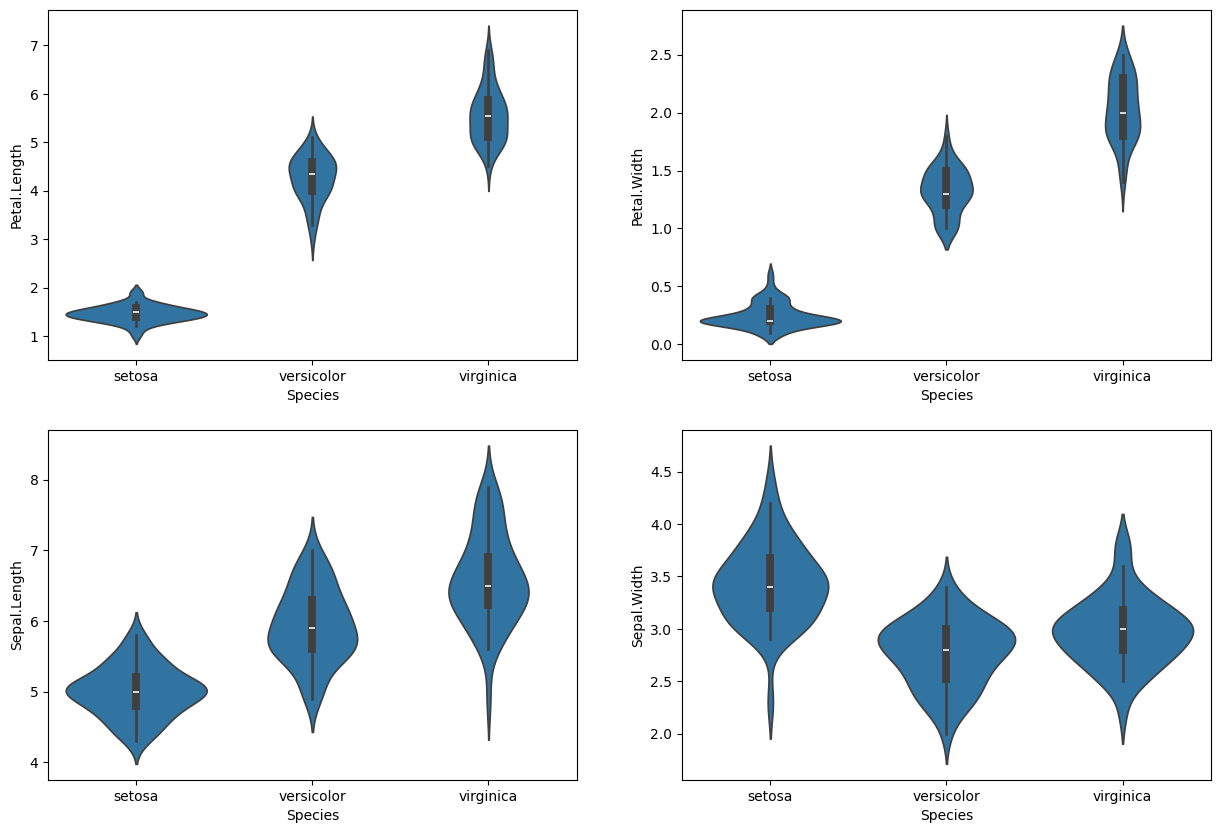

In [10]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x='Species', y='Petal.Length', data=data)
plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='Petal.Width', data=data)
plt.subplot(2, 2, 3)
sns.violinplot(x='Species', y='Sepal.Length', data=data)
plt.subplot(2, 2, 4)
sns.violinplot(x='Species', y='Sepal.Width', data=data)
plt.show()

# Visualize pair plots

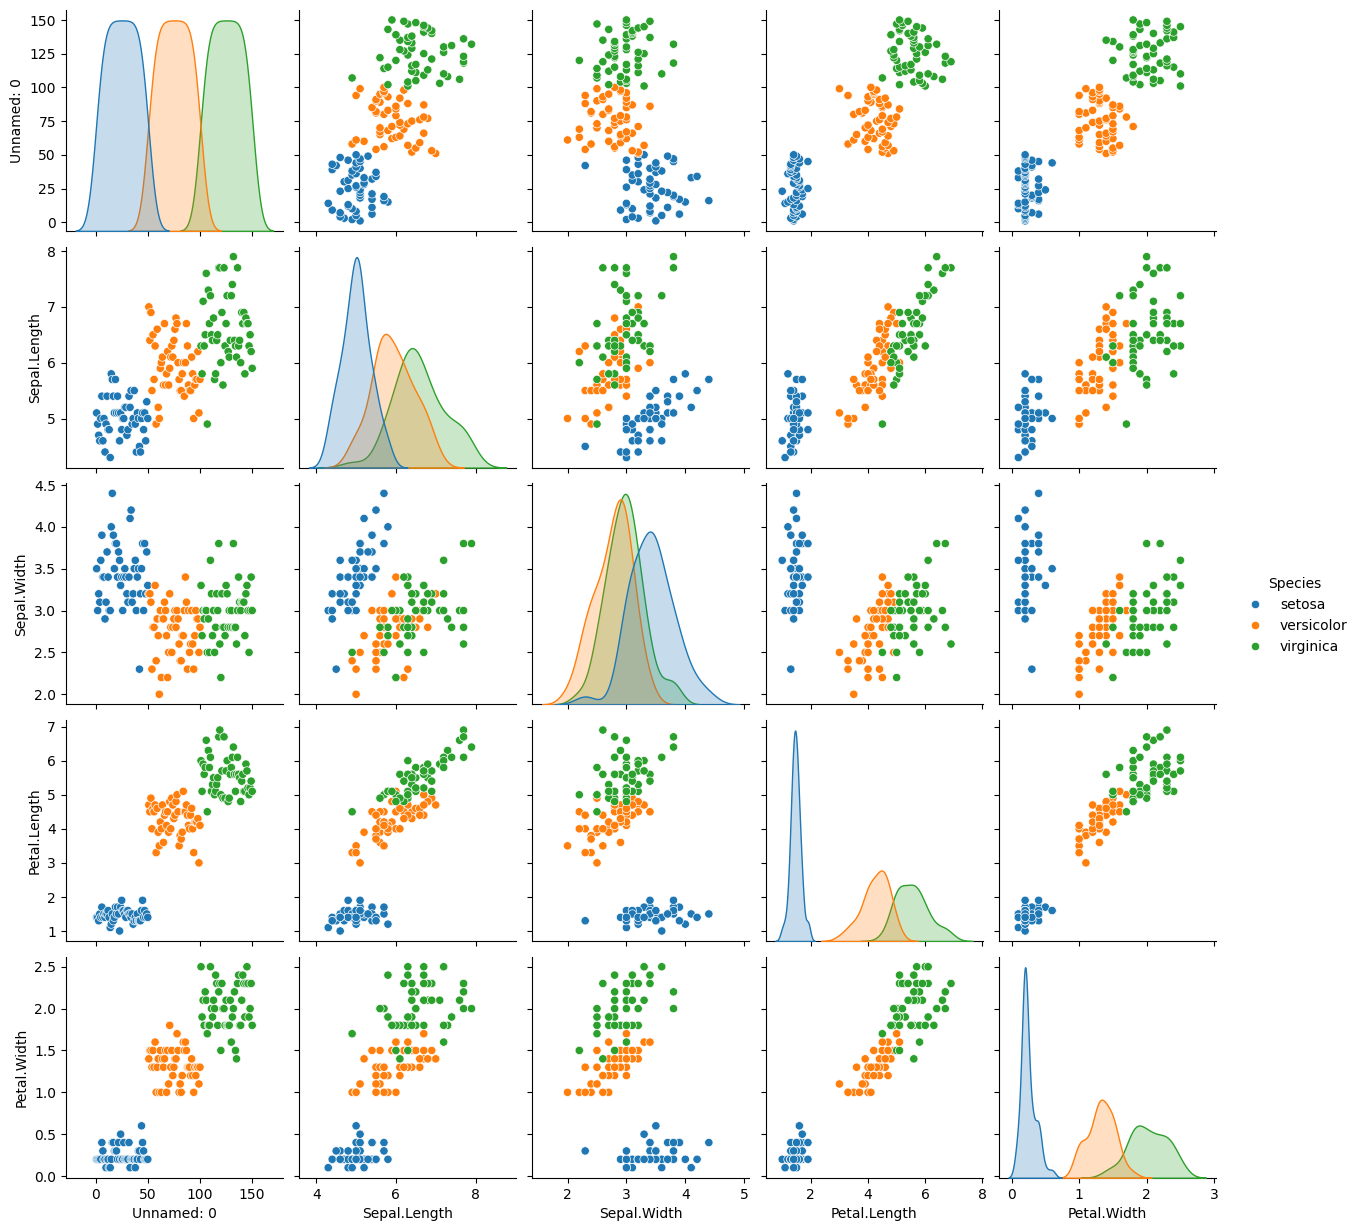

In [11]:
sns.pairplot(data, hue='Species')
plt.show()

# Visualize the correlation matrix

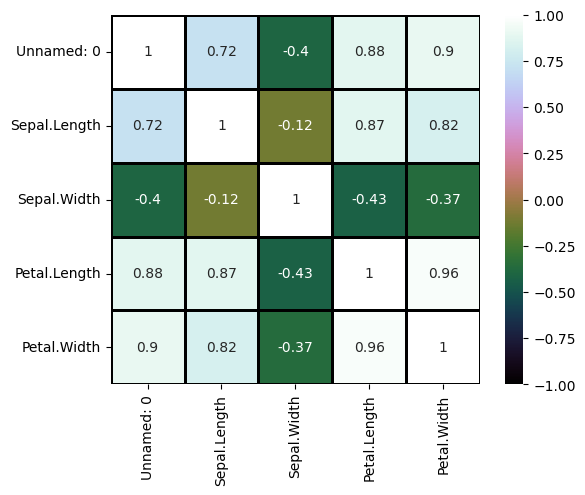

In [12]:
numeric_data = data.select_dtypes(include=[np.number])
fig = sns.heatmap(numeric_data.corr(), annot=True, cmap='cubehelix', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1)
plt.show()

# Prepare the data for training the testing

In [13]:
train, test = train_test_split(data, test_size=0.25)

print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


# Define features and target variables

In [14]:
features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
train_X = train[features]
train_y = train['Species']
test_X = test[features]
test_y = test['Species']

# Train a logistic regression model

In [15]:
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

# Make predictions and evaluate accuracy 

In [16]:
prediction = model.predict(test_X)
accuracy = metrics.accuracy_score(prediction, test_y)
print('Accuracy:', accuracy)

Accuracy: 0.9210526315789473
